# ***Importing the nesseccary libararies***

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### ***Reading data and understanding what each ds does and what i want to extract , gaining some knowledge about the data***

In [2]:
races_ds = pd.read_csv(r"D:\Documents\MIA training\Task2\F1 RACE DS\races.csv")#
lap_times_ds = pd.read_csv(r"D:\Documents\MIA training\Task2\F1 RACE DS\lap_times.csv")
drivers_ds = pd.read_csv(r"D:\Documents\MIA training\Task2\F1 RACE DS\drivers.csv")#
driver_standings_ds = pd.read_csv(r"D:\Documents\MIA training\Task2\F1 RACE DS\driver_standings.csv")
results_data = pd.read_csv(r"D:\Documents\MIA training\Task2\F1 RACE DS\results.csv")#
status_ds  = pd.read_csv(r"D:\Documents\MIA training\Task2\F1 RACE DS\status.csv")#

In [ ]:
datasets= [races_ds , lap_times_ds , drivers_ds , driver_standings_ds , results_data , status_ds]
for data in datasets:
    print(data.columns)
    print('\n')

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')


Index(['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds'], dtype='object')


Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')


Index(['driverStandingsId', 'raceId', 'driverId', 'points', 'position',
       'positionText', 'wins'],
      dtype='object')


Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')


Index(['statusId', 'status'], dtype='object')




## **Pre-processing and Cleaning**

In [4]:
#ressults , driver , driver standings , status files 
results_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int64  
 1   raceId           26759 non-null  int64  
 2   driverId         26759 non-null  int64  
 3   constructorId    26759 non-null  int64  
 4   number           26759 non-null  object 
 5   grid             26759 non-null  int64  
 6   position         26759 non-null  object 
 7   positionText     26759 non-null  object 
 8   positionOrder    26759 non-null  int64  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int64  
 11  time             26759 non-null  object 
 12  milliseconds     26759 non-null  object 
 13  fastestLap       26759 non-null  object 
 14  rank             26759 non-null  object 
 15  fastestLapTime   26759 non-null  object 
 16  fastestLapSpeed  26759 non-null  object 
 17  statusId    

In [5]:
results_data.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,54,8,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3


### ***adapting data types***

In [64]:
# (time , fastestlaptime )-> date time , (millisecond) -> date time ,( rank , fatestlap) -> int , fastestlapspeed -> (float) 
results_data['time'] = pd.to_datetime(results_data['time'] , errors='coerce')
results_data['milliseconds'] = pd.to_timedelta(results_data['milliseconds'] , unit='ms' , errors='coerce')
# results_data['fastestLapTime'] = pd.to_timedelta('00:' + results_data['fastestLapTime'], errors='coerce')
# results_data['fastestLapSpeed'] = results_data['fastestLapSpeed'].str.extract('(\d+\.?\d*)')[0]
results_data['fastestLapSpeed'] = pd.to_numeric(results_data['fastestLapSpeed'] , errors='coerce')
results_data['rank'] = pd.to_numeric(results_data['rank'] , errors='coerce').astype('Int64')
results_data['fastestLap'] = pd.to_numeric(results_data['fastestLap'] , errors='coerce').astype('Int64')
results_data['position'] = pd.to_numeric(results_data['position'] , errors='coerce').astype('Int64')

results_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   resultId         26759 non-null  int64          
 1   raceId           26759 non-null  int64          
 2   driverId         26759 non-null  int64          
 3   constructorId    26759 non-null  int64          
 4   number           26759 non-null  object         
 5   grid             26759 non-null  int64          
 6   position         15806 non-null  Int64          
 7   positionText     26759 non-null  object         
 8   positionOrder    26759 non-null  int64          
 9   points           26759 non-null  float64        
 10  laps             26759 non-null  int64          
 11  time             1126 non-null   datetime64[ns] 
 12  milliseconds     7680 non-null   timedelta64[ns]
 13  fastestLap       8252 non-null   Int64          
 14  rank             8510 

In [12]:
results_data.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,2025-08-16 01:34:50.616,0 days 00:00:00.005690616,39,2,0 days 00:01:27.452000,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,NaT,0 days 00:00:00.005696094,41,3,0 days 00:01:27.739000,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,NaT,0 days 00:00:00.005698779,41,5,0 days 00:01:28.090000,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,NaT,0 days 00:00:00.005707797,58,7,0 days 00:01:28.603000,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,NaT,0 days 00:00:00.005708630,43,1,0 days 00:01:27.418000,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,NaT,NaT,50,14,0 days 00:01:29.639000,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,NaT,NaT,54,8,0 days 00:01:29.534000,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,NaT,NaT,20,4,0 days 00:01:27.903000,217.180,5
8,9,18,9,2,4,2,<NA>,R,9,0.0,47,NaT,NaT,15,9,0 days 00:01:28.753000,215.100,4
9,10,18,10,7,12,18,<NA>,R,10,0.0,43,NaT,NaT,23,13,0 days 00:01:29.558000,213.166,3


In [13]:
results_data.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
number                 0
grid                   0
position           10953
positionText           0
positionOrder          0
points                 0
laps                   0
time               25633
milliseconds       19079
fastestLap         18507
rank               18249
fastestLapTime     18507
fastestLapSpeed    18507
statusId               0
dtype: int64

In [ ]:
# i want to drop nulls but the number of nulls = 18k row which is big so i will keep the data for now


### **the first demand is to get the top 10 drivers based on there total points** 
1. i want to get each driver id then calculate the total points in all races -> group by driver id .sum()

In [ ]:
#after grouping by the id and i want to get the total points i need to sort them descending to get the top10
#first_dem = driver_standings_ds['points'].groupby(driver_standings_ds['driverId']).sum()
#this syntax is not the best and it gives me wrong answer i guess 

In [8]:
first_dem = (driver_standings_ds.groupby('driverId')['points'].sum()
.to_frame('total points').sort_values('total points' ,ascending=False))
first_dem
#after group by i wanted to convert it to data frame and renaming the col for better declaration 
#then to get the heighst 10 drivers -> sorting (descending)

,total points
driverId,
1,51153.5
830,32849.5
20,32026.0
4,24579.0
822,19541.0
...,...
293,0.0
342,0.0
343,0.0


In [9]:
first_dem.head(10)

,total points
driverId,
1,51153.5
830,32849.5
20,32026.0
4,24579.0
822,19541.0
8,19069.0
815,18893.0
3,16910.0
844,16024.0


In [15]:
#another way to get it from results data
first_dem2 = (results_data.groupby('driverId')['points'].sum()
.to_frame('total points').sort_values('total points' ,ascending=False))
first_dem2.head(10)

top_10 = first_dem2[:10]

In [17]:
top_10

,total points
driverId,
1,4820.5
20,3098.0
830,2912.5
4,2329.0
8,1873.0
822,1788.0
3,1594.5
815,1585.0
30,1566.0


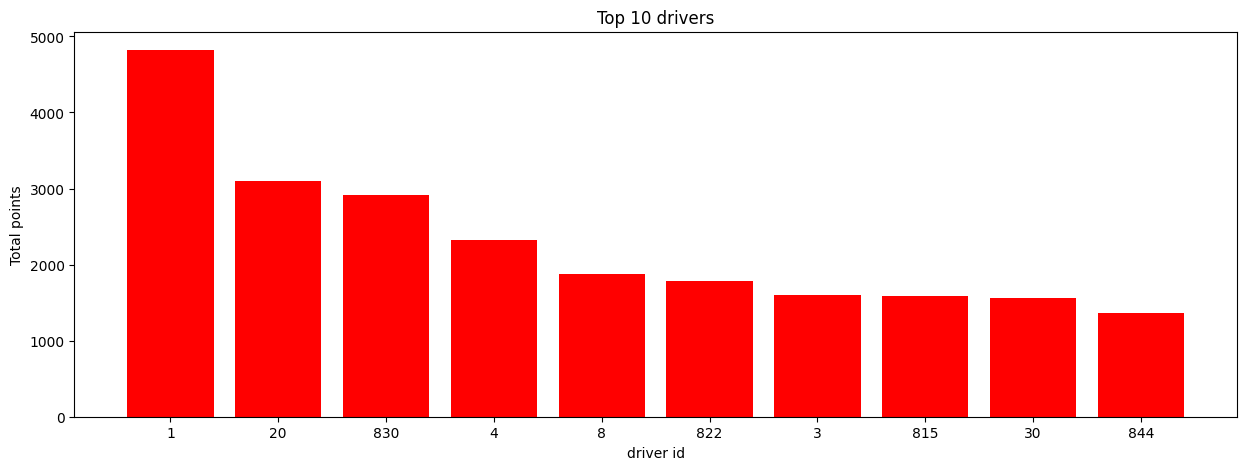

In [34]:
#i faced a problem with .index part i couldn't get the driver id from top_10 at first but then after searching i found mwthod .index.str
plt.figure(figsize=(15, 5))
plt.xlabel('driver id')
plt.title('Top 10 drivers')
plt.ylabel('Total points')
plt.bar(top_10.index.astype(str), top_10['total points'] , color = 'red')
plt.show()

### **second demand**

In [28]:
#the second demand was about to ger which team scored the most points per race start
#this demand wants to measure the effciency not just the biggest team so we want to calc the total points / race start entries
# for the team i want the const id and for the points i need col points and for the number of races i want the race id
top_teams = (
    results_data.groupby('constructorId').agg(
        total_points = ('points' , 'sum'),
        race_starts = ('raceId' , 'count') # counts the unique  number of races 
    )
    .reset_index()
)

top_teams

,constructorId,total_points,race_starts
0,1,7022.5,1923
1,2,308.0,140
2,3,3641.0,1676
3,4,1777.0,787
4,5,500.0,536
...,...,...,...
206,210,293.0,380
207,211,283.0,76
208,213,306.0,166
209,214,498.0,180


In [31]:
#calculating the number of points per race start  (points per race start) ->pprs
top_teams['pprs'] = (
    top_teams['total_points'] / top_teams['race_starts']
)

#sorting to get the top ten ones 
top_teams = top_teams.sort_values('pprs' , ascending=False)
second_dem = top_teams[:10]

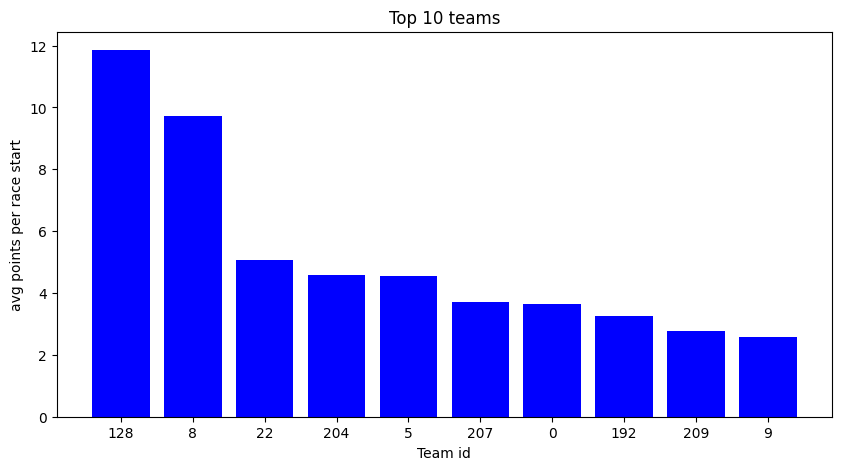

In [41]:
plt.figure(figsize=(10 , 5))
plt.xlabel('Team id')
plt.title('Top 10 teams')
plt.ylabel('avg points per race start')
plt.bar(second_dem.index.astype(str) , second_dem['pprs'] , color = 'blue')
plt.show()

### ***Third Demand***
 (Reliability Analysis: Which season had the most DNFs, and what were the common causes?)

In [65]:
# this damnd wants to know in which season has teams didn't finish the race and what the common causes 
# i can get the season through the race date -> year 
# and make a groupby season and filters it to keep only DNFs 
# then get the season which has the highst DNFs and from the status_id we can get the casue by making join between results and status dataset


print(results_data.columns)
print(status_ds.columns)
print(races_ds.columns)

results_data['position']# the nulls means that they didnot finish the race 


Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')
Index(['statusId', 'status'], dtype='object')
Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')


0           1
1           2
2           3
3           4
4           5
         ... 
26754      16
26755      17
26756    <NA>
26757    <NA>
26758    <NA>
Name: position, Length: 26759, dtype: Int64

In [66]:
#filtering th df ro get the col w pos = nulls only means didn't finish the race 
df_dnfs = results_data[results_data['position'].isna()]

In [67]:
df_dnfs.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
8,9,18,9,2,4,2,<NA>,R,9,0.0,47,NaT,NaT,15,9,0 days 00:01:28.753000,215.100,4
9,10,18,10,7,12,18,<NA>,R,10,0.0,43,NaT,NaT,23,13,0 days 00:01:29.558000,213.166,3
10,11,18,11,8,18,19,<NA>,R,11,0.0,32,NaT,NaT,24,15,0 days 00:01:30.892000,210.038,7
11,12,18,12,4,6,20,<NA>,R,12,0.0,30,NaT,NaT,20,16,0 days 00:01:31.384000,208.907,8
12,13,18,13,6,2,4,<NA>,R,13,0.0,29,NaT,NaT,23,6,0 days 00:01:28.175000,216.510,5


In [68]:
#then i want to get the race ids 
df_dnfs_race_ids = df_dnfs['raceId'].unique()

In [69]:
#then merging
dnf_races_with_year = races_ds[races_ds['raceId'].isin(df_dnfs_race_ids)]


In [70]:
#group by year
season_with_dnfs = (
    dnf_races_with_year.groupby('year')['raceId'].count()
    .to_frame('number of dnfs').sort_values('number of dnfs' , ascending=False)
)
season_with_dnfs

,number of dnfs
year,
2022,21
2024,20
2018,20
2017,20
2012,20
...,...
1956,8
1957,8
1961,8


In [71]:
#printing the season with the heighst number of dnfs
print(f'The season which contained the most number of DNFs is :{season_with_dnfs.index[0]}')

The season which contained the most number of DNFs is :2022


### ***The forth demand (Worst Performers)***
Who lost the most positions from start to finish?

In [76]:
#firstly i didn't know what happens to make the racer loses a position so after searching i found out that
# subtracting positions -> grid position - final position
# so at first i will filter the racers who didn't finish the race
valid_data_racers = results_data[results_data['position'].notna()]

valid_data_racers['loss']= valid_data_racers['grid']  - valid_data_racers['position']

# i made a mistak but discovered it later that i should have sum the total pos loss per racer
answer = (
    valid_data_racers.groupby('driverId').agg(
        total_pos_loss = ('loss' , 'sum')
        )
        .sort_values('total_pos_loss' , ascending= True)
)

answer


C:\Users\moham\AppData\Local\Temp\ipykernel_20008\2642974841.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_racers['loss']= valid_data_racers['grid']  - valid_data_racers['position']


,total_pos_loss
driverId,
102,-32
537,-28
536,-25
852,-25
521,-23
...,...
156,487
65,489
105,504
